# Network-anomaly detection on a smart grid-network

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ls

drive/  sample_data/


### Project Objectives
This project is to build a **Machine Learning Model** to predict Network-anomaly detection on a smart grid-network.
The traget variable..........

### Table of Content
1. [Data importation](#1.Data-gathering-and-cleaning)

2. [Exploratory data analysis, data cleaning, and Feature engineering](#2.Exploratory-data-analysis,data-cleaning,and-Feature-engineering)

3. [Data preprocessing for modelling](#3.Data-preprocessing-for-modelling)

4. [Building different Classification models](#4.Building-of-Models)

5. [Model Evaluation](#5.Model-Evaluation-and-Comparison)

6. [Model selection](#6.Implementing-the-best-Best-model-with-test-data)





## Importing the needed packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [5]:
# Importing the needed classes for building models,validation, and metrics.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Multi-Class Data1

## 1.Data-gathering-and-cleaning

#### About the data

In [6]:
data1 = pd.read_csv('/content/drive/MyDrive/Network-Anomalies-Detection-on-the-Smart-Grid-Network/3 Classes/data9.csv')

In [7]:
data1.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-5.781144,132462.0854,-125.752777,132411.9389,114.236325,132537.3052,0.784952,264.04462,-124.251627,279.60897,121.088900,260.56553,-5.763955,132462.0854,0.0,0.0,0.0,0.0,-0.865166,267.88993,58.802659,10.62038,-170.827367,9.33861,60.010,-0.01,15.790144,-0.134151,0,-10.005799,131780.3438,-129.943543,131632.9375,110.014349,131858.7500,168.088073,267.539978,43.316346,285.192505,-71.243593,265.010834,-9.978333,131754.7813,0.0,0.0,0.0,0.0,166.643379,272.335053,-132.865908,10.471344,-0.079651,10.305405,60.012001,-0.01,15.659703,-3.122046,0,-9.998114,131308.7150,-129.969746,131283.6417,110.036545,131308.7150,167.916741,266.24194,43.235395,281.98940,-71.499403,262.76285,-9.980925,131308.7150,0.0,0.0,0.0,0.0,166.484346,270.08725,-134.834158,10.25416,-0.658901,9.52172,60.010,-0.01,15.540528,-3.118328,0,-5.718119,132512.2320,-125.706940,131860.3269,114.310810,132587.4518,0.710468,261.11486,-124.079740,277.59476,121.272247,258.91754,-5.706660,132311.6458,0.0,0.0,0.0,0.0,-0.779223,265.69261,59.536044,10.07105,-169.515293,9.88794,60.010,-0.01,16.072240,-0.129374,0,0,0,0,0,0,0,0,0,0,0,0,0,NoEvents
1,-3.833088,132863.2577,-123.804720,132838.1845,116.178652,132938.4775,1.329262,268.25615,-122.475458,279.42586,121.661858,265.32639,-3.815899,132888.3310,0.0,0.0,0.0,0.0,0.126051,270.81969,57.312968,8.05684,-170.443485,7.14129,60.001,0.00,15.178838,-0.103731,0,-8.017273,132212.2656,-127.971503,132064.2813,111.975405,132289.1094,168.527527,272.426605,44.826965,284.706116,-71.007384,271.064758,-8.000794,132187.3906,0.0,0.0,0.0,0.0,167.412417,275.917053,-134.656688,7.707596,-3.414002,7.724762,60.000999,0.00,14.947800,-3.096700,0,-8.027139,131734.9606,-127.998771,131709.8873,112.018979,131760.0339,168.443862,270.27036,44.874055,282.17251,-71.098333,268.80548,-7.998491,131734.9606,0.0,0.0,0.0,0.0,167.366702,273.56634,-134.771133,7.50751,-2.796034,7.32440,60.001,0.00,14.975545,-3.093748,0,-3.770062,132913.4043,-123.753154,132286.5725,116.241677,132963.5508,1.432394,265.14328,-122.315030,277.59476,121.753531,264.41084,-3.758603,132737.8914,0.0,0.0,0.0,0.0,0.252101,268.80548,60.510073,7.50751,-172.122251,7.50751,60.001,0.00,15.439784,-0.108443,0,0,0,0,0,0,0,0,0,0,0,0,0,NoEvents
2,-3.729955,132687.7448,-123.695858,132637.5983,116.281785,132737.8914,0.899544,270.27036,-122.504106,280.52452,121.255058,267.52371,-3.712767,132687.7448,0.0,0.0,0.0,0.0,-0.148969,272.65079,57.032219,7.32440,-169.538212,6.59196,60.001,0.00,14.944187,-0.091569,0,-7.934876,132008.8906,-127.883613,131862.7656,112.079777,132102.6719,168.296817,273.811340,44.859924,285.221100,-71.358948,272.741333,-7.907410,131989.7969,0.0,0.0,0.0,0.0,167.236635,277.130127,-133.772288,7.101059,-4.534607,7.095337,60.000999,0.00,14.739044,-3.090944,0,-7.941195,131559.4477,-127.895639,1315

## 2.Exploratory-data-analysis,data-cleaning,and-Feature-engineering

### Inspecting the data 

In [8]:
data1.shape

(5340, 129)

### Checking the data types of the different columns

In [9]:
data1.dtypes

R1-PA1:VH     float64
R1-PM1:V      float64
R1-PA2:VH     float64
R1-PM2:V      float64
R1-PA3:VH     float64
               ...   
snort_log1      int64
snort_log2      int64
snort_log3      int64
snort_log4      int64
marker         object
Length: 129, dtype: object

### Checking for missing values

In [10]:
data1.isnull().sum()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [11]:
data1.isnull().sum().sum()

0

From the explorations above, there are no missing values


### Separating Numerical variables and Categorical variables

In [12]:
categorical_var = data1.select_dtypes(include = 'object') 

numerical_var = data1.select_dtypes(include = np.number) 

In [13]:
# Categorical variables
categorical_var.columns

Index(['marker'], dtype='object')

###  Creating a function to explore the categorical variables

To easily explore the explore, the categorical variables a function created to give a quick numerical and graphical summary.

In [14]:
# Creating a function to explore the categorical variables
def explore_cat(df,x):
    '''
    This function return a sumaary of a categorical variable
    
    '''
    unique_categories = df[x].nunique()
    if unique_categories <=6:
        print('Summary')
        print('==========')
        print(df[x].describe(),'\n')
        sns.countplot(df[x])
        plt.show()
        print('==============================================')
        print('Value counts \n')
        print(df[x].value_counts(normalize=True)*100,'\n')
        print('==============================================')
        print('Missing values: {}'.format(df[x].isnull().sum()))
    else:
        print('Summary')
        print('==========')
        print(df[x].describe(),'\n')
        sns.countplot(y=df[x])
        plt.show()
        print('==============================================')
        print('Value counts \n')
        print(df[x].value_counts(),'\n')
        print('==============================================')
        print('Missing values: {}'.format(df[x].isnull().sum()))
    
    
    
    

#### Exploring  Credit-Application-Result

Summary
count       5340
unique         3
top       Attack
freq        3570
Name: marker, dtype: object 



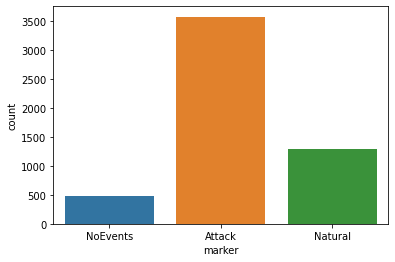

Value counts 

Attack      66.853933
Natural     24.194757
NoEvents     8.951311
Name: marker, dtype: float64 

Missing values: 0


In [15]:
explore_cat(data1,'marker')

By exploring the marker variable, it is observed that there are two unique categories indicating natural and attack.

Comparatively, there are more Attacks than Naturals in high proportion

This clearly indicates that the data is not balanced.

The exploration also shows that the target variable (marker) has no missing values.

# Exploring the numerical Variables

In [16]:
# Numerical variables

numerical_var.columns

Index(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       ...
       'control_panel_log3', 'control_panel_log4', 'relay1_log', 'relay2_log',
       'relay3_log', 'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3',
       'snort_log4'],
      dtype='object', length=128)

In [17]:
numerical_var.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.0,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.0,5340.0,5340.000000,5340.000000,5340.000000,5340.000000,5340.0,5340.0,5340.000000,5340.000000
mean,-1.737969,130834.787934,-6.546773,131169.680425,0.768283,131493.022310,-2.199103,394.742091,-5.178296,387.918706,0.427163,381.154369,-1.783339,131157.467773,0.259391,307.795518,0.324837,95.578930,-2.247859,386.646126,-2.680159,10.066558,4.578892,9.966396,59.997520,-0.000655,inf,0.023017,58.375655,-2.207598,127385.966230,-3.255908,128361.255940,5.754300,128711.090844,14.645482,394.844792,-1.765213,392.509537,-3.372007,386.182044,-2.311305,128144.514671,0.194597,398.561326,0.325177,405.551176,14.276363,389.116283,1.583019,10.267952,1.789005,8.560451,60.005289,-0.000039,inf,-2.145398,0.0,-2.205000,127180.861236,-3.406032,128106.046117,5.622363,128502.710883,14.702657,395.660625,-2.744097,392.477185,-3.552784,387.814258,-2.314532,127921.720020,0.194865,397.688356,0.323490,405.130516,14.748383,390.390246,1.757166,9.535093,1.522407,7.668057,60.005299,0.000107,inf,-2.245977,25.698876,-1.682249,131237.582898,-6.881219,131437.202500,0.673035,131857.314399,-1.952383,395.172593,-5.178682,387.390559,1.548645,383.443696,-1.594330,131503.194877,0.412112,289.122375,0.344105,76.293587,-2.195303,387.450690,-2.102803,10.017709,5.026193,8.946163,60.000374,0.001144,inf,0.030169,13.458801,0.000375,0.000375,0.0,0.0,0.039888,0.029026,0.023783,0.036

A general inspection of the descriptive statistics above indicates that variables have different scales which may cause models to put more weight on those with high values at the expense of those with low values.

To resolve this, the variables may or may not be scaled depending on the kind of algorithm that is used.

### Calculating correlation among the numerical variables to investigate for multi-colinearity

In [18]:
cor = numerical_var.corr()

In [19]:
cor

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
R1-PA1:VH,1.000000,-0.031544,-0.271628,-0.011682,-0.411179,-0.012075,0.917413,0.028349,-0.271898,0.014183,-0.398664,0.006693,0.996507,-0.023986,-0.055664,0.036414,-0.043199,0.036839,0.927897,0.016556,0.048252,0.037960,-0.226331,0.040467,0.019013,-0.021837,0.017940,0.006517,-0.009746,0.878999,0.014918,-0.315626,0.044070,-0.318498,0.048436,-0.502890,0.008050,0.221144,0.009185,0.080142,0.004471,0.879849,0.035233,-0.053217,0.025698,-0.048968,0.022910,-0.504733,0.003757,-0.124809,0.028582,0.434232,0.027050,-0.015690,-0.003435,0.063075,0.029978,NaN,0.879007,0.015555,-0.314978,0.044092,-0.319370,0.049563,-0.506287,-0.020581,0.246621,-0.035555,0.057986,-0.033067,0.879856,0.035876,-0.053171,0.025745,-0.048921,0.022910,-0.508346,-0.031571,-0.125042,0.026064,0.436294,0.020113,-0.015670,-0.005801,0.005585,0.058646,0.004845,0.938993,0.008530,-0.263044,0.027976,-0.397671,0.020687,0.883897,-0.032426,-0.275407,-0.036337,-0.368471,-0.033583,0.940135,0.016149,-0.052262,0.001533,-0.052541,-0.004245,0.899163,-0.036805,0.050339,0.006319,-0.236038,-0.002235,0.002129,-0.002328,0.007137,-0.024279,-0.006178,0.003407,0.003407,NaN,NaN,-0.049383,-0.022202,0.009237,0.006161,NaN,NaN,0.012096,0.012096
R1-PM1:V,-0.031544,1.000000,0.019402,0.736518,-0.030354,0.744461,0.014654,-0.718618,0.001656,-0.306660,-0.013141,-0.238557,-0.025929,0.940491,-0.073582,-0.905122,-0.128260,-0.891473,0.004087,-0.418904,0.036566,-0.826162,0.030148,-0.873172,0.032727,-0.024827,0.090533,-0.630651,-0.081200,-0.027608,0.577894,0.003674,0.194047,-0.005593,0.073686,0.036684,-0.491462,0.000179,-0.301928,0.000979,-0.225185,-0.022147,0.347150,-0.050119,-0.770143,-0.081824,-0.647894,0.050558,-0.268661,-0.000041,-0.784253,-0.006455,-0.642685,-0.002491,-0.065185,0.088636,-0.079046,NaN,-0.027592,0.577790,0.003547,0.193394,-0.005765,0.073208,0.001070,-0.314062,0.022120,0.059377,0.016003,-0.037564,-0.022131,0.346834,-0.049977,-0.770251,-0.081892,-0.647907,0.002713,-0.055025,-0.001830,-0.725972,0.000599,-0.559558,-0.002549,-0.062756,0.051973,-0.058222,-0.191991,-0.005829,0.597456,0.016970,0.375520,-0.008030,0.400918,-0.003832,-0.336779,-0.016937,0.073109,-0.011807,-0.039256,-0.013930,0.541159,-0.105963,-0.633758,-0.084047,-0.449206,-0.004038,-0.086747,0.014258,-0.677450,0.026384,-0.493690,-0.138570,-0.106027,0.023530,-0.530885,-0.078052,0.006768,0.006768,NaN,NaN,0.087983,-0.018334,-0.193147,-0.173529,NaN,NaN,-0.064703,-0.064703
R1-PA2:VH,-0.271628,0.019402,1.000000,-0.012786,-0.326984,-0.005371,-0.255624,0.006686,0.906466,0.032801,-0.315612,0.028574,-0.272239,0.006352,-0.024368,-0.030846,-0.040732,-0.025671,-0.257609,0.024883,-0.198319,-0.026994,0.084434,-0.022190,-0.017047,0.014324,-0.024455,-0.007047,-0.009171,-0.221535,0.006161,0.841776,-0.015861,-0.378647,-0.020603,-0.066171,0.0191

In [20]:

mask = np.triu(np.ones_like(cor,dtype=bool))
half_cor_matrix = cor.mask(mask)
half_cor_matrix

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
R1-PA1:VH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1-PM1:V,-0.031544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1-PA2:VH,-0.271628,0.019402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1-PM2:V,-0.011682,0.736518,-0.012786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1-PA3:VH,-0.411179,-0.030354,-0.326984,-0.021881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Highly correlated variables

In [21]:
# Creating a list comprehension to pick the variable with high variance.

highly_correlated_variables = [i for i in half_cor_matrix.columns if any (half_cor_matrix[i]>0.9) ] 
print(highly_correlated_variables)
print(f'\n There are {len(highly_correlated_variables)} correlated variables')

['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH', 'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I', 'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM8:V', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I', 'R1-PM11:I', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH', 'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I', 'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH', 'R2-PM9:V', 'R2-PA10:IH', 'R2-PM11:I', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PM2:V', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PM5:I', 'R3-PM6:I', 'R3-PM8:V', 'R3-PM10:I', 'R3-PM11:I', 'R4-PA1:VH', 'R4-PM1:V', 'R4-PM2:V', 'R4-PA3:VH', 'R4-PM3:V', 'R4-PA4:IH', 'R4-PM5:I', 'R4-PM6:I', 'R4-PA7:VH', 'R4-PA8:VH', 'R4-PM8:V', 'R4-PM9:V', 'R4-PM11:I', 'control_panel_log1', 'snort_log3']

 There are 67 correlated variables


# 3.Data-preprocessing-for-modelling

### Changing the target variable to a dummy variable

In [22]:
data1['marker'] =data1['marker'].replace({'Natural':0,'Attack':1, "NoEvents":2})

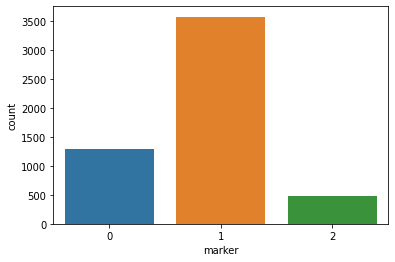

In [23]:

sns.countplot(data1['marker'])
plt.show()

In [24]:
# Dropping variables with infinite values
data1 = data1.drop(['R1-PA:Z','R2-PA:Z','R3-PA:Z','R4-PA:Z'],axis=1)


### Seperating the data into target variable and predictors

In [25]:
# predictors
X = data1.drop('marker',axis = 1)

# Target variable
y = data1['marker']# 

In [26]:
X.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,-5.781144,132462.0854,-125.752777,132411.9389,114.236325,132537.3052,0.784952,264.04462,-124.251627,279.60897,121.088900,260.56553,-5.763955,132462.0854,0.0,0.0,0.0,0.0,-0.865166,267.88993,58.802659,10.62038,-170.827367,9.33861,60.010,-0.01,-0.134151,0,-10.005799,131780.3438,-129.943543,131632.9375,110.014349,131858.7500,168.088073,267.539978,43.316346,285.192505,-71.243593,265.010834,-9.978333,131754.7813,0.0,0.0,0.0,0.0,166.643379,272.335053,-132.865908,10.471344,-0.079651,10.305405,60.012001,-0.01,-3.122046,0,-9.998114,131308.7150,-129.969746,131283.6417,110.036545,131308.7150,167.916741,266.24194,43.235395,281.98940,-71.499403,262.76285,-9.980925,131308.7150,0.0,0.0,0.0,0.0,166.484346,270.08725,-134.834158,10.25416,-0.658901,9.52172,60.010,-0.01,-3.118328,0,-5.718119,132512.2320,-125.706940,131860.3269,114.310810,132587.4518,0.710468,261.11486,-124.079740,277.59476,121.272247,258.91754,-5.706660,132311.6458,0.0,0.0,0.0,0.0,-0.779223,265.69261,59.536044,10.07105,-169.515293,9.88794,60.010,-0.01,-0.129374,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-3.833088,132863.2577,-123.804720,132838.1845,116.178652,132938.4775,1.329262,268.25615,-122.475458,279.42586,121.661858,265.32639,-3.815899,132888.3310,0.0,0.0,0.0,0.0,0.126051,270.81969,57.312968,8.05684,-170.443485,7.14129,60.001,0.00,-0.103731,0,-8.017273,132212.2656,-127.971503,132064.2813,111.975405,132289.1094,168.527527,272.426605,44.826965,284.706116,-71.007384,271.064758,-8.000794,132187.3906,0.0,0.0,0.0,0.0,167.412417,275.917053,-134.656688,7.707596,-3.414002,7.724762,60.000999,0.00,-3.096700,0,-8.027139,131734.9606,-127.998771,131709.8873,112.018979,131760.0339,168.443862,270.27036,44.874055,282.17251,-71.098333,268.80548,-7.998491,131734.9606,0.0,0.0,0.0,0.0,167.366702,273.56634,-134.771133,7.50751,-2.796034,7.32440,60.001,0.00,-3.093748,0,-3.770062,132913.4043,-123.753154,132286.5725,116.241677,132963.5508,1.432394,265.14328,-122.315030,277.59476,121.753531,264.41084,-3.758603,132737.8914,0.0,0.0,0.0,0.0,0.252101,268.80548,60.510073,7.50751,-172.122251,7.50751,60.001,0.00,-0.108443,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-3.729955,132687.7448,-123.695858,132637.5983,116.281785,132737.8914,0.899544,270.27036,-122.504106,280.52452,121.255058,267.52371,-3.712767,132687.7448,0.0,0.0,0.0,0.0,-0.148969,272.65079,57.032219,7.32440,-169.538212,6.59196,60.001,0.00,-0.091569,0,-7.934876,132008.8906,-127.883613,131862.7656,112.079777,132102.6719,168.296817,273.811340,44.859924,285.221100,-71.358948,272.741333,-7.907410,131989.7969,0.0,0.0,0.0,0.0,167.236635,277.130127,-133.772288,7.101059,-4.534607,7.095337,60.000999,0.00,-3.090944,0,-7.941195,131559.4477,-127.895639,131534.3744,112.099193,131559.4477,168.140195,272.28457,44.868325,282.53873,-71.499403,270.08725,-7.906818,131534.3744,0.0,0.0,0.0,0.0,167.143248,274.84811,-135.

In [27]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: marker, dtype: int64

### Splitting the data into 70% train set and 30% test set

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 0)

In [29]:
X_train.shape

(3738, 124)

# Feature selection using feature importance

In [30]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))

train score: 1.00
test score: 0.94


In [31]:
Feature_importance=pd.DataFrame({'Features':X_train.columns,'Importance':rfc.feature_importances_})

In [32]:
Feature_importance = Feature_importance.sort_values(by = 'Importance',ascending = False)

In [33]:
first_45 = Feature_importance['Features'].values[0:45]

In [34]:
first_45

array(['R4-PM2:V', 'R1-PA3:VH', 'R3-PA3:VH', 'R3-PA2:VH', 'R1-PA2:VH',
       'R1-PM2:V', 'R2-PA3:VH', 'R2-PM5:I', 'R3-PA7:VH', 'R2-PA5:IH',
       'R4-PA3:VH', 'R1-PA5:IH', 'R2-PA2:VH', 'R2-PA7:VH', 'R3-PA1:VH',
       'R4-PA5:IH', 'R3-PM2:V', 'R4-PA6:IH', 'R4-PA2:VH', 'R2-PA1:VH',
       'R4-PM5:I', 'R4-PM7:V', 'R2-PM1:V', 'R3-PM5:I', 'R1-PM5:I',
       'R2-PA6:IH', 'R1-PA6:IH', 'R2-PM6:I', 'R4-PA7:VH', 'R1-PA1:VH',
       'R2-PM3:V', 'R1-PM10:I', 'R2-PM7:V', 'R2-PM4:I', 'R1-PA7:VH',
       'R3-PA6:IH', 'R3-PA5:IH', 'R3-PA4:IH', 'R3-PM10:I', 'R4-PM3:V',
       'R3-PA:ZH', 'R4-PA4:IH', 'R4-PA1:VH', 'R3-PA10:IH', 'R1-PM4:I'],
      dtype=object)

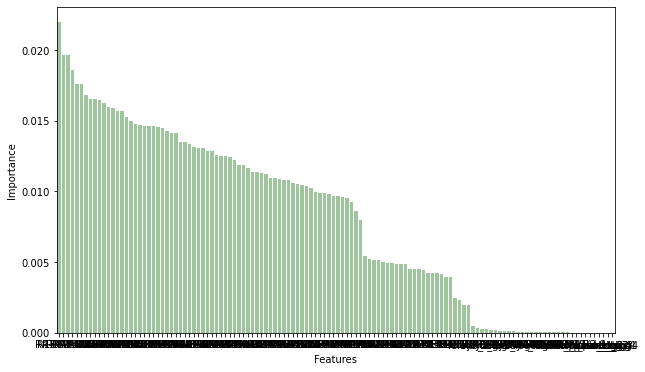

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(y='Importance',x='Features',data = Feature_importance, color = 'g',alpha = 0.4)
plt.show()

In [36]:
# # Before dropping unimportant features
# lgr = LogisticRegression()
# lgr.fit(X_train,y_train)
# print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
# print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))

In [37]:
#

# Selecting important features for training

In [38]:
X_train = X_train[first_45]
X_test = X_test[first_45]

In [39]:
# # After dropping unimportant features
# lgr = LogisticRegression()
# lgr.fit(X_train,y_train)
# print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
# print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))

### Checking whether the target variable is balanced or not

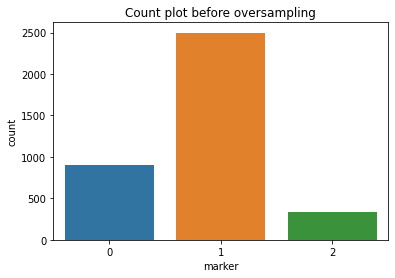

In [40]:
sns.countplot(y_train)
plt.title('Count plot before oversampling')
plt.show()

The graph above shows that the classes target variable is not balanced.

This presupposes that accuracy would not a good metric for measuring the performance of models built on this data.
Other metrics need to be employed in this case or the data should be balanced by employing a statiscal technique.

# 4.Building-of-Models

**In order to optimize the models, gridsearch with cross validation is applied to tune the hyperparameters of the different algorithms.**

## Decision tree as a base model

**Decision tree classifier before hyperparameter tuning**

In [41]:
#Instantiating the model
tree = DecisionTreeClassifier(random_state=42)

#Fitting the model
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)

# Print train and test accuracies
print('train accuracy: {:.2f}'.format(tree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(tree.score(X_test,y_test)))

train accuracy: 1.00
test accuracy: 0.90


**Hyperparameter tuning for decision tree**

In [42]:
# Hyperparameter tuning using gridsearch and cross validation.

#Instantiating the model
tree = DecisionTreeClassifier(random_state=42)
param_grid = {'max_features': [1,3,5,50,10,15,17,20,25,30,35,40,45],
              'max_leaf_nodes':[1,5,60,10,15,20,30,40,50,70,100,150,200]}
grid_tree = GridSearchCV(tree, param_grid = param_grid,cv =5)
grid_tree.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_tree.best_score_))
print('Best test score: {:.2f}'.format(grid_tree.score(X_test,y_test)))
print('Best parameters:',grid_tree.best_params_)


Best cross-validation acuracy: 0.89
Best test score: 0.89
Best parameters: {'max_features': 30, 'max_leaf_nodes': 200}


**Decision tree classifier after hyperparameter tuning**

In [47]:
#Instantiating the model
tree = DecisionTreeClassifier(max_features=40,max_leaf_nodes=200,random_state=42)

#Fitting the model
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)

# Print train and test accuracies
print('train accuracy: {:.2f}'.format(tree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(tree.score(X_test,y_test)))


train accuracy: 0.97
test accuracy: 0.90


# Support Vector Machine

**Support vector classifier before hyperparameter tuning**

In [48]:
# SVC before Hyper-parameters tuning

Svc = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(probability=True))])
#Svc = SVC(probability=True)
Svc_model = Svc.fit(X_train,y_train)
print('train score: {:.2f}'.format(Svc_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(Svc_model.score(X_test,y_test)))

train score: 0.71
test score: 0.70


**Hyperparameter tuning for Support vector classifier**

In [128]:
#Hyper-parameter tuning with using pipline and gridsearch

pipe = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(probability=True,decision_function_shape='ovo'))])
param_grid = {'SVC__C':[0.001,0.01,0.1,1,10,100],
            'SVC__gamma':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(pipe, param_grid = param_grid,cv =5)
grid.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid.best_score_))
#print('Best train score: {:.2f}'.format(grid.score(X_train,y_train)))
print('Best test score: {:.2f}'.format(grid.score(X_test,y_test)))
print('Best parameters:',grid.best_params_)

Best cross-validation acuracy: 0.92
Best test score: 0.93
Best parameters: {'SVC__C': 100, 'SVC__gamma': 1}


**Support vector classifier after hyperparameter tuning**

In [49]:
# SVC with tuned Hyper-parameters
Svc = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(C=100,gamma=1,probability=True,decision_function_shape='ovo'))])
Svc_model = Svc.fit(X_train,y_train)
print('train score: {:.2f}'.format(Svc_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(Svc_model.score(X_test,y_test)))
Svc_y_pred = Svc_model.predict(X_test)

train score: 1.00
test score: 0.93


# Random Forest

**Random Forest classifier before hyperparameter tuning**

In [50]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))


train score: 1.00
test score: 0.94


**Hyperparameter tuning for Random Forestclassifier**

In [51]:
rfc = RandomForestClassifier(random_state = 0)
param_grid = {'max_features': [1,3,5,50,10,15,17,20,25,30,35,40,45],
              'max_leaf_nodes':[1,5,60,10,15,20,30,40,50,70,100,150,200],}
grid_rfc = GridSearchCV(rfc, param_grid = param_grid,cv =5)
grid_rfc.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc.best_score_))
print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc.best_params_)

Best cross-validation acuracy: 0.93
Best test score: 0.93
Best parameters: {'max_features': 17, 'max_leaf_nodes': 200}


**Random Forest  classifier after hyperparameter tuning**

In [94]:
RandomForestClassifier(max_features=10,max_leaf_nodes=10,random_state = 0)

RandomForestClassifier(max_features=10, max_leaf_nodes=10, random_state=0)

In [52]:
rfc = RandomForestClassifier(max_features=10,max_leaf_nodes=200,random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))
rfc_y_pred = rfc.predict(X_test)

train score: 0.99
test score: 0.93


In [59]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [60]:
from catboost import CatBoostClassifier

In [66]:
# Before hyperparameter tuning
cbc = CatBoostClassifier(loss_function='MultiClass')

# Fit 'catboost' to the training set
cbc.fit(X_train,y_train)
cbc_y_pred = cbc.predict(X_test)
print('Train accuracy of CatBoostClassifier: {:.3f}'.format(cbc.score(X_train,y_train)))
print('Test accuracy of CatBoostClassifier: {:.3f}'.format(cbc.score(X_test,y_test)))


Learning rate set to 0.084631
0:	learn: 1.0443867	total: 42.9ms	remaining: 42.9s
1:	learn: 0.9946109	total: 74.3ms	remaining: 37.1s
2:	learn: 0.9585354	total: 106ms	remaining: 35.3s
3:	learn: 0.9276540	total: 139ms	remaining: 34.6s
4:	learn: 0.8979468	total: 170ms	remaining: 33.8s
5:	learn: 0.8711878	total: 207ms	remaining: 34.3s
6:	learn: 0.8518464	total: 246ms	remaining: 34.9s
7:	learn: 0.8289888	total: 276ms	remaining: 34.2s
8:	learn: 0.8093126	total: 306ms	remaining: 33.7s
9:	learn: 0.7919760	total: 339ms	remaining: 33.5s
10:	learn: 0.7759270	total: 369ms	remaining: 33.2s
11:	learn: 0.7627347	total: 399ms	remaining: 32.9s
12:	learn: 0.7513131	total: 433ms	remaining: 32.9s
13:	learn: 0.7382120	total: 464ms	remaining: 32.7s
14:	learn: 0.7291750	total: 495ms	remaining: 32.5s
15:	learn: 0.7178324	total: 525ms	remaining: 32.3s
16:	learn: 0.7077528	total: 556ms	remaining: 32.2s
17:	learn: 0.6968854	total: 587ms	remaining: 32s
18:	learn: 0.6874736	total: 619ms	remaining: 32s
19:	learn: 0.

In [ ]:
cbc = CatBoostClassifier(loss_function='MultiClass'))
param_grid = {'depth': [4,5,6,7,8,9,10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10, 20,30,40,50,60,70,80,90,100]
                 }
grid_cbc = GridSearchCV(estimator=cbc, param_grid = param_grid, cv = 2, n_jobs=-1)
grid_cbc.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_cbc.best_score_))
print('Best test score: {:.2f}'.format(grid_cbc.score(X_test,y_test)))
print('Best parameters:',grid_cbc.best_params_)

KeyboardInterrupt: ignored

In [65]:
# After hyperparameter tuning
cbc = CatBoostClassifier(depth=10,iterations=120,learning_rate=0.04,loss_function='MultiClass')

# Fit 'catboost' to the training set
cbc.fit(X_train,y_train)
cbc_y_pred = cbc.predict(X_test)
print('Train accuracy of CatBoostClassifier: {:.3f}'.format(cbc.score(X_train,y_train)))
print('Test accuracy of CatBoostClassifier: {:.3f}'.format(cbc.score(X_test,y_test)))

0:	learn: 1.0721990	total: 334ms	remaining: 39.8s
1:	learn: 1.0458845	total: 678ms	remaining: 40s
2:	learn: 1.0218239	total: 1.15s	remaining: 45s
3:	learn: 0.9995592	total: 1.67s	remaining: 48.5s
4:	learn: 0.9768834	total: 2.27s	remaining: 52.1s
5:	learn: 0.9567305	total: 2.85s	remaining: 54.1s
6:	learn: 0.9371220	total: 3.21s	remaining: 51.8s
7:	learn: 0.9199559	total: 3.57s	remaining: 50s
8:	learn: 0.9030753	total: 3.91s	remaining: 48.3s
9:	learn: 0.8875144	total: 4.26s	remaining: 46.9s
10:	learn: 0.8704364	total: 4.6s	remaining: 45.6s
11:	learn: 0.8550153	total: 4.97s	remaining: 44.7s
12:	learn: 0.8415878	total: 5.33s	remaining: 43.8s
13:	learn: 0.8273233	total: 5.67s	remaining: 42.9s
14:	learn: 0.8152920	total: 6.03s	remaining: 42.2s
15:	learn: 0.8035139	total: 6.37s	remaining: 41.4s
16:	learn: 0.7914585	total: 6.71s	remaining: 40.7s
17:	learn: 0.7801483	total: 7.08s	remaining: 40.1s
18:	learn: 0.7684741	total: 7.42s	remaining: 39.5s
19:	learn: 0.7584457	total: 7.76s	remaining: 38.

# 5.Model-Evaluation-and-Comparison

Different metrics are considered for evaluating and comparing the models.
Since the classes in the target variable (marker) is not balanced, 
accuracy is definetly not a good metric to rely on in this case hence will be used to only check for overfitting and underfitting.
Confusion matrix,F1 score,and Receiver Operation Curve will employed in evaluating and comparing the models.

## AUC,Precision,Recall and F1 scores 

In [67]:
tree_y_prod = tree.predict_proba(X_test)
svc_y_prod = Svc.predict_proba(X_test)
rfc_y_prod = rfc.predict_proba(X_test)
cbc_y_prod = cbc.predict_proba(X_test)


In [69]:
# 1.Decision tree
dct_auc_score = roc_auc_score(y_test,tree_y_prod,multi_class="ovr", average="weighted")
dct_precision_score = precision_score(y_test,tree_y_pred,average='weighted')
dct_recall_score = recall_score(y_test,tree_y_pred,average='weighted')
dct_f1_score = f1_score(y_test,tree_y_pred,average='weighted')

# 3.Support vector classifier
svc_auc_score = roc_auc_score(y_test,svc_y_prod,multi_class="ovr", average="weighted")
svc_precision_score = precision_score(y_test,Svc_y_pred,average='weighted')
svc_recall_score = recall_score(y_test,Svc_y_pred,average='weighted')
svc_f1_score=f1_score(y_test,Svc_y_pred,average='weighted')

# 4.Random Forest
rfc_auc_score = roc_auc_score(y_test,rfc_y_prod,multi_class="ovr", average="weighted")
rfc_precision_score = precision_score(y_test,rfc_y_pred,average='weighted')
rfc_recall_score = recall_score(y_test,rfc_y_pred,average='weighted')
rfc_f1_score=f1_score(y_test,rfc_y_pred,average='weighted')


# 4. Catboost classifier
cb_auc_score = roc_auc_score(y_test,cbc_y_prod,multi_class="ovr", average="weighted")
cb_precision_score = precision_score(y_test,cbc_y_pred,average='weighted')
cb_recall_score = recall_score(y_test,cbc_y_pred,average='weighted')
cb_f1_score=f1_score(y_test,cbc_y_pred,average='weighted')


## Creating a DataFrame with Models,Accuracy Scores and F1_scores

In [70]:
Model =['Decision tree','SVC','Random Forest', "Catboost Classifier"]

Auc_score = [dct_auc_score,svc_auc_score,rfc_auc_score,cb_auc_score]

Precison_score = [dct_precision_score,svc_precision_score,rfc_precision_score,cb_precision_score]

Recall_score = [dct_recall_score,svc_recall_score,rfc_recall_score,cb_recall_score]

F1_score = [dct_f1_score,svc_f1_score,rfc_f1_score,cb_f1_score]


In [71]:
len(Model)

4

In [72]:
#Creating the DataFrame

Accuracy_f1_score_report=pd.DataFrame({'Model':Model,
                                       "Auc_score":Auc_score,
                                       "Precison_score": Precison_score,
                                       "Recall_score":Recall_score,
                                        'F1_score':F1_score})
                                # index=np.arange(1,7,1))

#Sorting by fi_score
Accuracy_f1_score_report.sort_values(by='F1_score',
                                     ascending=False,
                                     inplace=True,
                                     ignore_index=True)


Accuracy_f1_score_report.set_index('Model')

,Auc_score,Precison_score,Recall_score,F1_score
Model,,,,
Catboost Classifier,0.977940,0.937913,0.937578,0.936342
Random Forest,0.985981,0.931841,0.930712,0.929207
SVC,0.967673,0.926476,0.926966,0.925630
Decision tree,0.904564,0.894805,0.895131,0.894882


In [74]:
Accuracy_f1_score_report

,Model,Auc_score,Precison_score,Recall_score,F1_score
0,Catboost Classifier,0.977940,0.937913,0.937578,0.936342
1,Random Forest,0.985981,0.931841,0.930712,0.929207
2,SVC,0.967673,0.926476,0.926966,0.925630
3,Decision tree,0.904564,0.894805,0.895131,0.894882


In [75]:
Accuracy_f1_score_report.to_csv('data1_multiclass_metrics.csv',index=False)